In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../get_branch/max_pooling')
sys.path.append('../get_branch/interpolate')
sys.path.append('../get_branch/adaptive_avg_pooling')
sys.path.append('../model_json/make_json_program/cnn')
sys.path.append('../util')

import json
import numpy as np
import matplotlib.pyplot as plt
import util_for_hist

import make_esrgan_generator_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch
import interpolate_branch
import adaptive_avg_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 224

In [3]:
make_esrgan_generator_json.make_json()

In [4]:
json_file = open('../model_json/json/esrgan_generator.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer1': {'input_channels': 64,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 7},
 'layer2': {'input_channels': 96,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 3},
 'layer3': {'input_channels': 128,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 2},
 'layer4': {'input_channels': 160,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 1},
 'layer5': {'input_channels': 192,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer6': {'input_channels': 64,
  'out_channels': 32,
  'kernel_siz

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            print(linear_hidden_branch.get_branch(layer_json_value))
            print(len(linear_hidden_branch.get_branch(layer_json_value)))
            print("##########################")
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "interpolate":
            one_layer_branch_list, IMG_SIZE = interpolate_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "adaptive_avg_pooling":
            one_layer_branch_list, IMG_SIZE = adaptive_avg_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            print(linear_output_branch.get_branch(layer_json_value))
            print(len(linear_output_branch.get_branch(layer_json_value)))
            print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

[576 576 576 ... 576 576 576]
150528
##########################
[295 295 295 ... 295 295 295]
3211264
##########################
[291 291 291 ... 291 291 291]
4816896
##########################
[290 290 290 ... 290 290 290]
6422528
##########################
[289 289 289 ... 289 289 289]
8028160
##########################
[576 576 576 ... 576 576 576]
9633792
##########################
[293 293 293 ... 293 293 293]
3211264
##########################
[291 291 291 ... 291 291 291]
4816896
##########################
[290 290 290 ... 290 290 290]
6422528
##########################
[289 289 289 ... 289 289 289]
8028160
##########################
[576 576 576 ... 576 576 576]
9633792
##########################
[293 293 293 ... 293 293 293]
3211264
##########################
[291 291 291 ... 291 291 291]
4816896
##########################
[290 290 290 ... 290 290 290]
6422528
##########################
[289 289 289 ... 289 289 289]
8028160
##########################
[576 576 576 ... 576 576 5

array([576., 576., 576., ...,  27.,  27.,  27.])

In [6]:
IMG_SIZE

896

In [7]:
sort_set_branch_list = util_for_hist.get_sort_branch_list(branch_list)
sort_set_branch_list

[4.0, 27.0, 289.0, 290.0, 291.0, 293.0, 295.0, 576.0]

In [8]:
max_branch = util_for_hist.get_max_set_branch(sort_set_branch_list)
max_branch

576.0

In [9]:
min_sabun = util_for_hist.get_min_sabun(sort_set_branch_list)
min_sabun

23.0

In [10]:
bins = util_for_hist.get_bin(max_branch,min_sabun)
bins

26

(array([1.60563200e+07, 5.13802240e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.74365440e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.47868672e+08]),
 array([  0.        ,  22.15384615,  44.30769231,  66.46153846,
         88.61538462, 110.76923077, 132.92307692, 155.07692308,
        177.23076923, 199.38461538, 221.53846154, 243.69230769,
        265.84615385, 288.        , 310.15384615, 332.30769231,
        354.46153846, 376.61538462, 398.76923077, 420.92307692,
        443.07692308, 465.23076923, 487.38461538, 509.53846154,
        531.69230769, 553.84615385, 576.        ]),
 <a list of 26 Patch objects>)

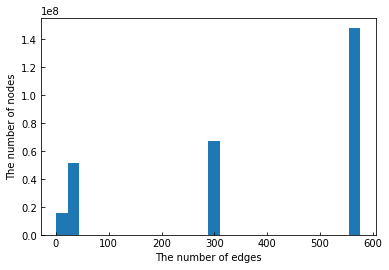

In [11]:
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.xlabel("The number of edges")
plt.ylabel("The number of nodes")
plt.hist(branch_list,bins=bins,range=(0,max_branch))